# 서울시 따릉이 대여량 예측 경진대회
#### < python을 이용하여 선택한 변수들로 대여량 예측하고 qt5로 구현해보기 >

### 1. 라이브러리 호출

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from sklearn.linear_model import LinearRegression      # 선형회귀
from sklearn.ensemble import RandomForestRegressor     # 랜덤포레스트
%matplotlib inline
warnings.simplefilter("ignore")

### 2. 데이터 셋 구성하기

#### 1) 데이터 불러오기

In [28]:
train = pd.read_csv("C:/Users/user13/Documents/Study/따릉이/train.csv")
test = pd.read_csv("C:/Users/user13/Documents/Study/따릉이/test.csv")
submission = pd.read_csv("C:/Users/user13/Documents/Study/따릉이/submission.csv")

#### 2) 데이터 확인

In [29]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [30]:
train.shape, test.shape, submission.shape

((1459, 11), (715, 10), (715, 2))

### 3. 전처리

#### 1) 결측치 처리
* hour_bef_precipitation : 최빈값(0)으로 처리
* 나머지 열 : 평균값으로 처리

In [31]:
# train 데이터셋 결측치 처리
train['hour_bef_precipitation'].fillna('0', inplace=True)
train.fillna(train.mean(), inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   float64
 3   hour_bef_precipitation  1459 non-null   object 
 4   hour_bef_windspeed      1459 non-null   float64
 5   hour_bef_humidity       1459 non-null   float64
 6   hour_bef_visibility     1459 non-null   float64
 7   hour_bef_ozone          1459 non-null   float64
 8   hour_bef_pm10           1459 non-null   float64
 9   hour_bef_pm2.5          1459 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 125.5+ KB


In [32]:
# test 데이터셋 결측치 처리
test['hour_bef_precipitation'].fillna('0', inplace=True)
test.fillna(test.mean(), inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    715 non-null    float64
 3   hour_bef_precipitation  715 non-null    object 
 4   hour_bef_windspeed      715 non-null    float64
 5   hour_bef_humidity       715 non-null    float64
 6   hour_bef_visibility     715 non-null    float64
 7   hour_bef_ozone          715 non-null    float64
 8   hour_bef_pm10           715 non-null    float64
 9   hour_bef_pm2.5          715 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 56.0+ KB


#### 3) 변수 정의

In [33]:
x_train = train.drop(['id','count'], axis=1)
y_train = train['count']
x_test = test.drop(['id'], axis=1)

In [34]:
x_train.shape, y_train.shape, x_test.shape

((1459, 9), (1459,), (715, 9))

### 3. 학습

#### 1) LinearRegression

In [35]:
# 모델 생성
model_LR = LinearRegression()

# 학습
model_LR.fit(x_train, y_train)

# 예측값
y_pred_LR = model_LR.predict(x_test)

#### 2) RandomForestRegressor

In [36]:
# 모델 생성
model_RF100 = RandomForestRegressor(n_estimators=100, random_state=0)
model_RF150 = RandomForestRegressor(n_estimators=150, random_state=0)

# 모델 학습
model_RF100.fit(x_train, y_train)
model_RF150.fit(x_train, y_train)

# 예측값
y_pred_RF100 = model_RF100.predict(x_test)
y_pred_RF150 = model_RF150.predict(x_test)

### 4. 결과

In [37]:
submission['count'] = (y_pred_LR + y_pred_RF100 + y_pred_RF150) / 3
submission['count_LR'] = y_pred_LR
submission['count_RF100'] = y_pred_RF100
submission['count_RF150'] = y_pred_RF150
submission

,id,count,count_LR,count_RF100,count_RF150
0,0,94.514424,103.623271,89.68,90.240000
1,1,224.535381,237.486142,216.82,219.300000
2,2,69.472937,54.478812,77.50,76.440000
3,4,56.349883,110.166314,28.87,30.013333
4,5,82.192091,91.486274,78.03,77.060000
...,...,...,...,...,...
710,2148,77.729017,108.097052,62.65,62.440000
711,2149,71.057570,69.752711,71.98,71.440000
712,2165,128.648869,134.666608,125.94,125.340000
713,2166,168.180846,188.775872,156.70,159.066667


In [38]:
result = submission.drop(['id'], axis=1)
result

,count,count_LR,count_RF100,count_RF150
0,94.514424,103.623271,89.68,90.240000
1,224.535381,237.486142,216.82,219.300000
2,69.472937,54.478812,77.50,76.440000
3,56.349883,110.166314,28.87,30.013333
4,82.192091,91.486274,78.03,77.060000
...,...,...,...,...
710,77.729017,108.097052,62.65,62.440000
711,71.057570,69.752711,71.98,71.440000
712,128.648869,134.666608,125.94,125.340000
713,168.180846,188.775872,156.70,159.066667


<AxesSubplot: >

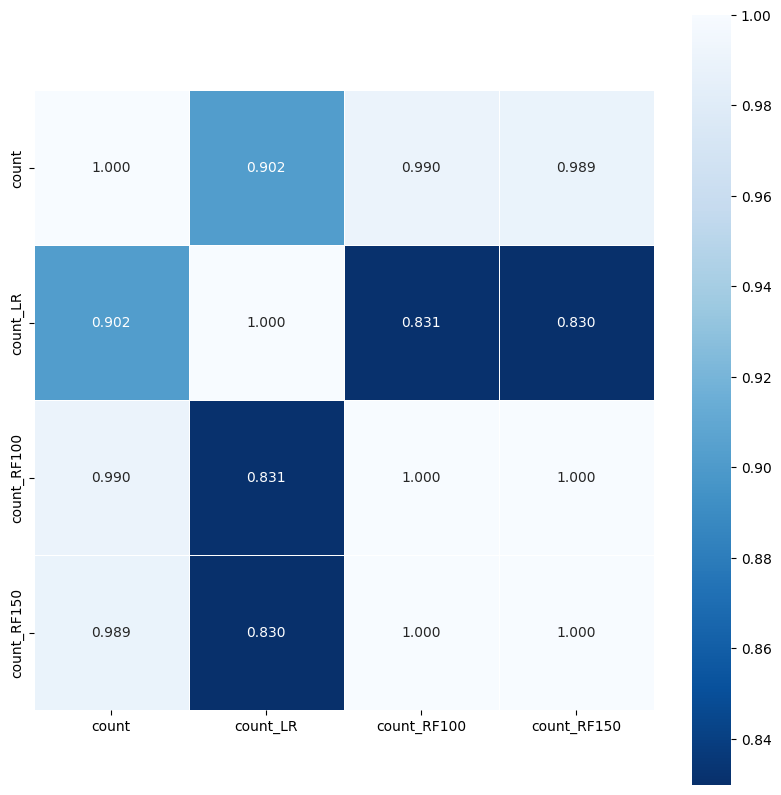

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(result.corr(), annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')